In [ ]:
!pip install prov[dot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 421 kB 7.7 MB/s 
     |████████████████████████████████| 500 kB 39.8 MB/s 
     |████████████████████████████████| 41 kB 533 kB/s 


In [ ]:
import prov.model as prov
from prov.model import ProvDocument, Namespace, Literal, PROV, Identifier
import datetime
d1 = ProvDocument()  # d1 is now an empty provenance document

In [ ]:
# Declaring namespaces for various prefixes 
d1.add_namespace('prov', 'http://www.w3.org/ns/prov#')
d1.add_namespace('foaf', 'http://xmlns.com/foaf/0.1/')
d1.add_namespace('base', 'http://www.RDorg.it/')
d1.add_namespace('user', 'http://www.RDorg.it/people/')
#Add DCterms namespace
d1.add_namespace('dcterms', 'http://purl.org/dc/terms/')
#Add REPRODUCE-ME
d1.add_namespace('repr', 'https://w3id.org/reproduceme')

<Namespace: repr {https://w3id.org/reproduceme}>

In [ ]:
#Declaring agents
ag1 = d1.agent ('user:University', {'prov:type':'Organization','foaf:name' : "Universitätsspital_Basel"})
ag2 = d1.agent ('user:Research_group', {'prov:type':'Organization','foaf:name' : "Cardiac_surgery_and_engineering_group"})

In [ ]:
#Declaring responsibilities
d1.actedOnBehalfOf (ag2, ag1)

<ProvDelegation: (user:Research_group, user:University)>

In [ ]:
#Declaring entities
e1 = d1.entity ('base:Sample')
e2 = d1.entity ('base:Isolated_cells')
e3 = d1.entity ('base:Expanded_cell_culture')
e4 = d1.entity ('base:Scaffold')
e5 = d1.entity ('base:Seeded_scaffold')
e6 = d1.entity ('base:Mature_tissue')
e7 = d1.entity ('base:Biological_data')

e8 = d1.entity ('base:Growth_factors_and_other_regulatory_molecules')

e9 = d1.entity ('base:Isolation_and_expansion_protocol', {'prov:type':'Plan',
                                                          'prov:label':"Cell preparation for culture",
                                                          'dcterms:MediaType':"PDF",
                                                          'prov:location':"https://doi.org/10.1038/nprot.2008.40"})   
e21 = d1.entity ('base:Data_analysis_results')

e12 = d1.entity ('base:Electrical_stimulation_protocol_V2', {'prov:type':'Plan',
                                                          'prov:label':"Electrical stimulation",
                                                          'dcterms:MediaType':"PDF",
                                                          'prov:location':" https://doi.org/10.1002/term.377"})
e13 = d1.entity ('base:Sterilized_culture_chamber')
e23 = d1.entity ('base:Electric_stimulation_signal')

In [ ]:
e25 = d1.entity ('base:Electrical_stimulation_protocol_V1', {'prov:type':'Plan',
                                                          'prov:label':"Electrical stimulation",
                                                          'dcterms:MediaType':"PDF",
                                                          'prov:location':"https://doi.org/10.1038/nprot.2008.183"})
d1.wasRevisionOf (e25, e12)

<ProvDerivation: (base:Electrical_stimulation_protocol_V1, base:Electrical_stimulation_protocol_V2)>

In [ ]:
#Declaring activities
a1 = d1.activity ('base:Cell_isolation')  
a2 = d1.activity ('base:Cell_expansion')   
a3 = d1.activity ('base:Scaffold_preparation') 
a4 = d1.activity ('base:Scaffold_seeding') 
a5 = d1.activity ('base:Electrical_stimulation_and_tissue_culture') 
a6 = d1.activity ('base:Read_out/Characterization') 
a7 = d1.activity ('base:Biological_studies')
a8 = d1.activity ('base:Data_interpretation')
a9 = d1.activity ('base:Electrical_stimulation_chamber_preparation')

In [ ]:
#Declaring usage
d1.used (a1, e1)
d1.used (a1, e9)
d1.used (a2, e2)
d1.used (a2, e9)
d1.used (a3, e12)
d1.used (a4, e3)
d1.used (a4, e4)
d1.used (a5, e5)
d1.used (a5, e13)
d1.used (a9, e12)
d1.used (a5, e12)
d1.used (a5, e8)
d1.used (a5, e23)
d1.used (a6, e6)
d1.used (a6, e12)
d1.used (a7, e6)
d1.used (a8, e7)

<ProvUsage: (base:Data_interpretation, base:Biological_data)>

In [ ]:
#Declaring generation
d1.wasGeneratedBy (e2, a1)
d1.wasGeneratedBy (e3, a2)
d1.wasGeneratedBy (e4, a3)
d1.wasGeneratedBy (e5, a4)
d1.wasGeneratedBy (e6, a5)
d1.wasGeneratedBy (e7, a6)
d1.wasGeneratedBy (e7, a7)
d1.wasGeneratedBy (e13, a9)
d1.wasGeneratedBy (e21, a8)

<ProvGeneration: (base:Data_analysis_results, base:Data_interpretation)>

In [ ]:
#Declaring attribution
d1.wasAttributedTo (e1, ag1)
d1.wasAttributedTo (e2, ag2)
d1.wasAttributedTo (e3, ag2)
d1.wasAttributedTo (e4, ag2)
d1.wasAttributedTo (e5, ag2)
d1.wasAttributedTo (e6, ag2)
d1.wasAttributedTo (e7, ag2)
d1.wasAttributedTo (e21, ag2)

<ProvAttribution: (base:Data_analysis_results, user:Research_group)>

In [ ]:
d1.wasAssociatedWith (a1, ag2)
d1.wasAssociatedWith (a2, ag2)
d1.wasAssociatedWith (a3, ag2)
d1.wasAssociatedWith (a4, ag2)
d1.wasAssociatedWith (a5, ag2)
d1.wasAssociatedWith (a6, ag2)
d1.wasAssociatedWith (a7, ag2)
d1.wasAssociatedWith (a8, ag2)
d1.wasAssociatedWith (a9, ag2)

<ProvAssociation: (base:Electrical_stimulation_chamber_preparation, user:Research_group)>

In [ ]:
# visualize the graph
from prov.dot import prov_to_dot
dot = prov_to_dot(d1)
dot.write_png('Cardiac_tissue_engineering.png')

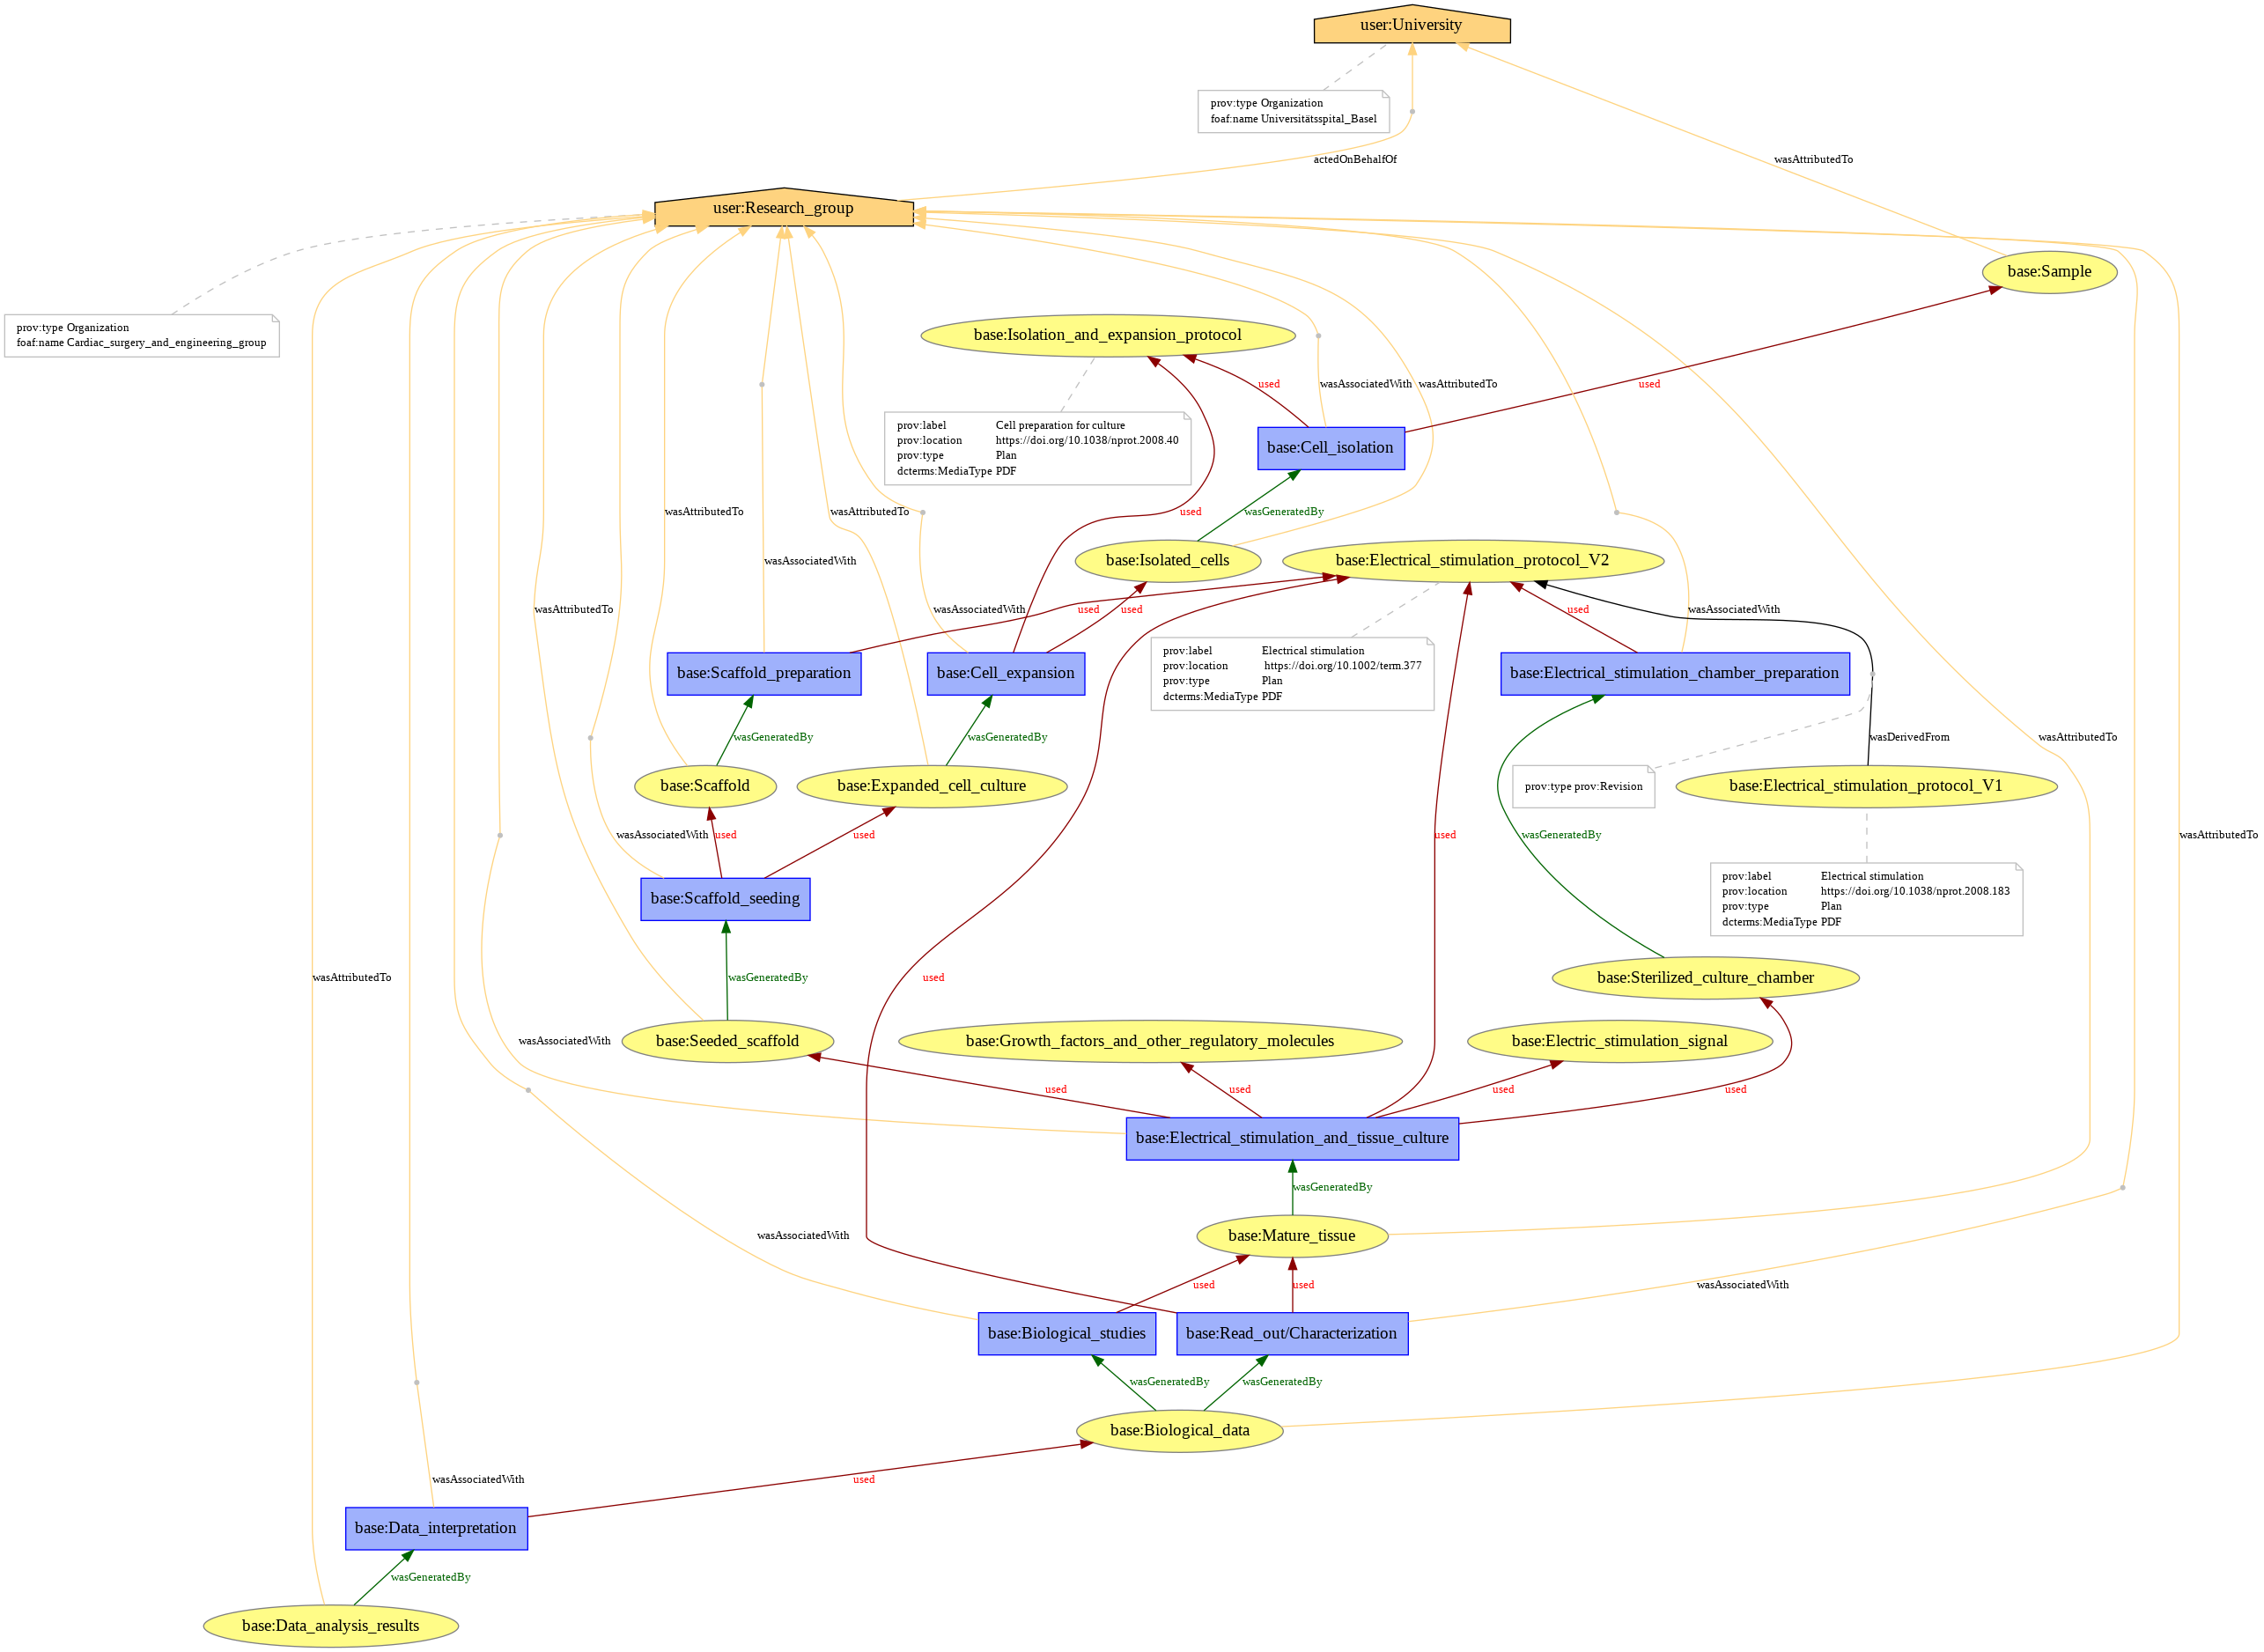

In [ ]:
# visualize the image
from IPython.display import Image 
Image('Cardiac_tissue_engineering.png')

In [ ]:
#Adding NCIT namespace (to define hertz)
d1.add_namespace ('ncit', "http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#")
d1.add_namespace ('sio', "http://semanticscience.org/resource/")
d1.add_namespace ('sct', "http://snomed.info/id/")
d1.add_namespace ('rdfs', "http://www.w3.org/2000/01/rdf-schema#")


<Namespace: rdfs {http://www.w3.org/2000/01/rdf-schema#}>

In [ ]:
#Declaring entities sub-activities
e14 = d1.entity ('base:Seeded_3D_scaffold_ready_for_assembly')
e15 = d1.entity ('base:Culture_chamber_ready_for_assembly')
e16 = d1.entity ('base:Assembled_culture_chamber')
e17 = d1.entity ('base:Input_electrical_signal')
e18 = d1.entity ('base:Output_electrical_signal')
e19 = d1.entity ('base:Culture_ready_construct')
e20 = d1.entity ('base:Cultured_tissue')
e24 = d1.entity ('base:Electric_stimulation_signal_parameters', {'prov:label':"Optimal setting parameters for electrical stimulation",
                                                                 'repr:Setting':'repr:Configuration',
                                                                 'ncit:C112417':"Monophasic",
                                                                 'ncit:C25677':'sct:262172008',
                                                                 'sio:SIO_000900':"3 Hz", 
                                                                 'ncit:C70813':"3 V",
                                                                 'sct:103335007':"2 ms", 
                                                                 'sct:704323007':"5 days",                                                               
                                                                 'rdfs:comment':"Monophasic square wave with 3Hz of frequency, 3 V of amplitude, 2ms duration, applied for 5 days"}) 
#monophasic square wave 3Hz, 3 V 2 ms 
#sio:SIO_000900 ("has frequency") used for signal frequency
#sct:704323007 (has duration)
#sct:103335007 (duration)
#ncit:C70813(voltage) 
#ncit:C112417 ("signal frequency") 
#ncit:C25677 ("shape")
#sct:262172008 ("squared waveform")

In [ ]:
#Declaring "specializationOf"
d1.specializationOf (e14, e5)
d1.specializationOf (e15, e13)
d1.specializationOf (e20, e6)
d1.specializationOf (e24, e23)

<ProvSpecialization: (base:Electric_stimulation_signal_parameters, base:Electric_stimulation_signal)>

In [ ]:
#Declaring sub-activities
a10 = d1.activity ('base:Culture_chamber_assembly')
a11 = d1.activity ('base:Electrical_signal_application')
a12 = d1.activity ('base:Electrical_signal_check')
a13 = d1.activity ('base:Tissue_culture')
a5 = d1.activity ('base:Electrical_stimulation_and_tissue_culture', other_attributes={'dcterms:hasPart': (a10, a11, a12, a13), 'repr:hasSetting':'base:Electric_stimulation_signal_parameters'})

In [ ]:
#Declaring activities
d1.used (a10, e14)
d1.used (a10, e15)
d1.used (a10, e12)
d1.used (a11, e16)
d1.used (a11, e17)
d1.used (a11, e12)
d1.used (a12, e18)
d1.used (a13, e19)
d1.used (a13, e24)
d1.wasInformedBy (a13, a12)

<ProvCommunication: (base:Tissue_culture, base:Electrical_signal_check)>

In [ ]:
#delcaring generation
d1.wasGeneratedBy (e16, a10)
d1.wasGeneratedBy (e18, a11)
d1.wasGeneratedBy (e19, a12)
d1.wasGeneratedBy (e20, a13)
d1.wasGeneratedBy (e24, a12)

<ProvGeneration: (base:Electric_stimulation_signal_parameters, base:Electrical_signal_check)>

In [ ]:
#Data analysis results
d1.wasInformedBy (a8, a7)

<ProvCommunication: (base:Data_interpretation, base:Biological_studies)>

In [ ]:
# visualize the graph
from prov.dot import prov_to_dot
dot = prov_to_dot(d1)
dot.write_png('Cardiac_tissue_engineering_subactivities.png')

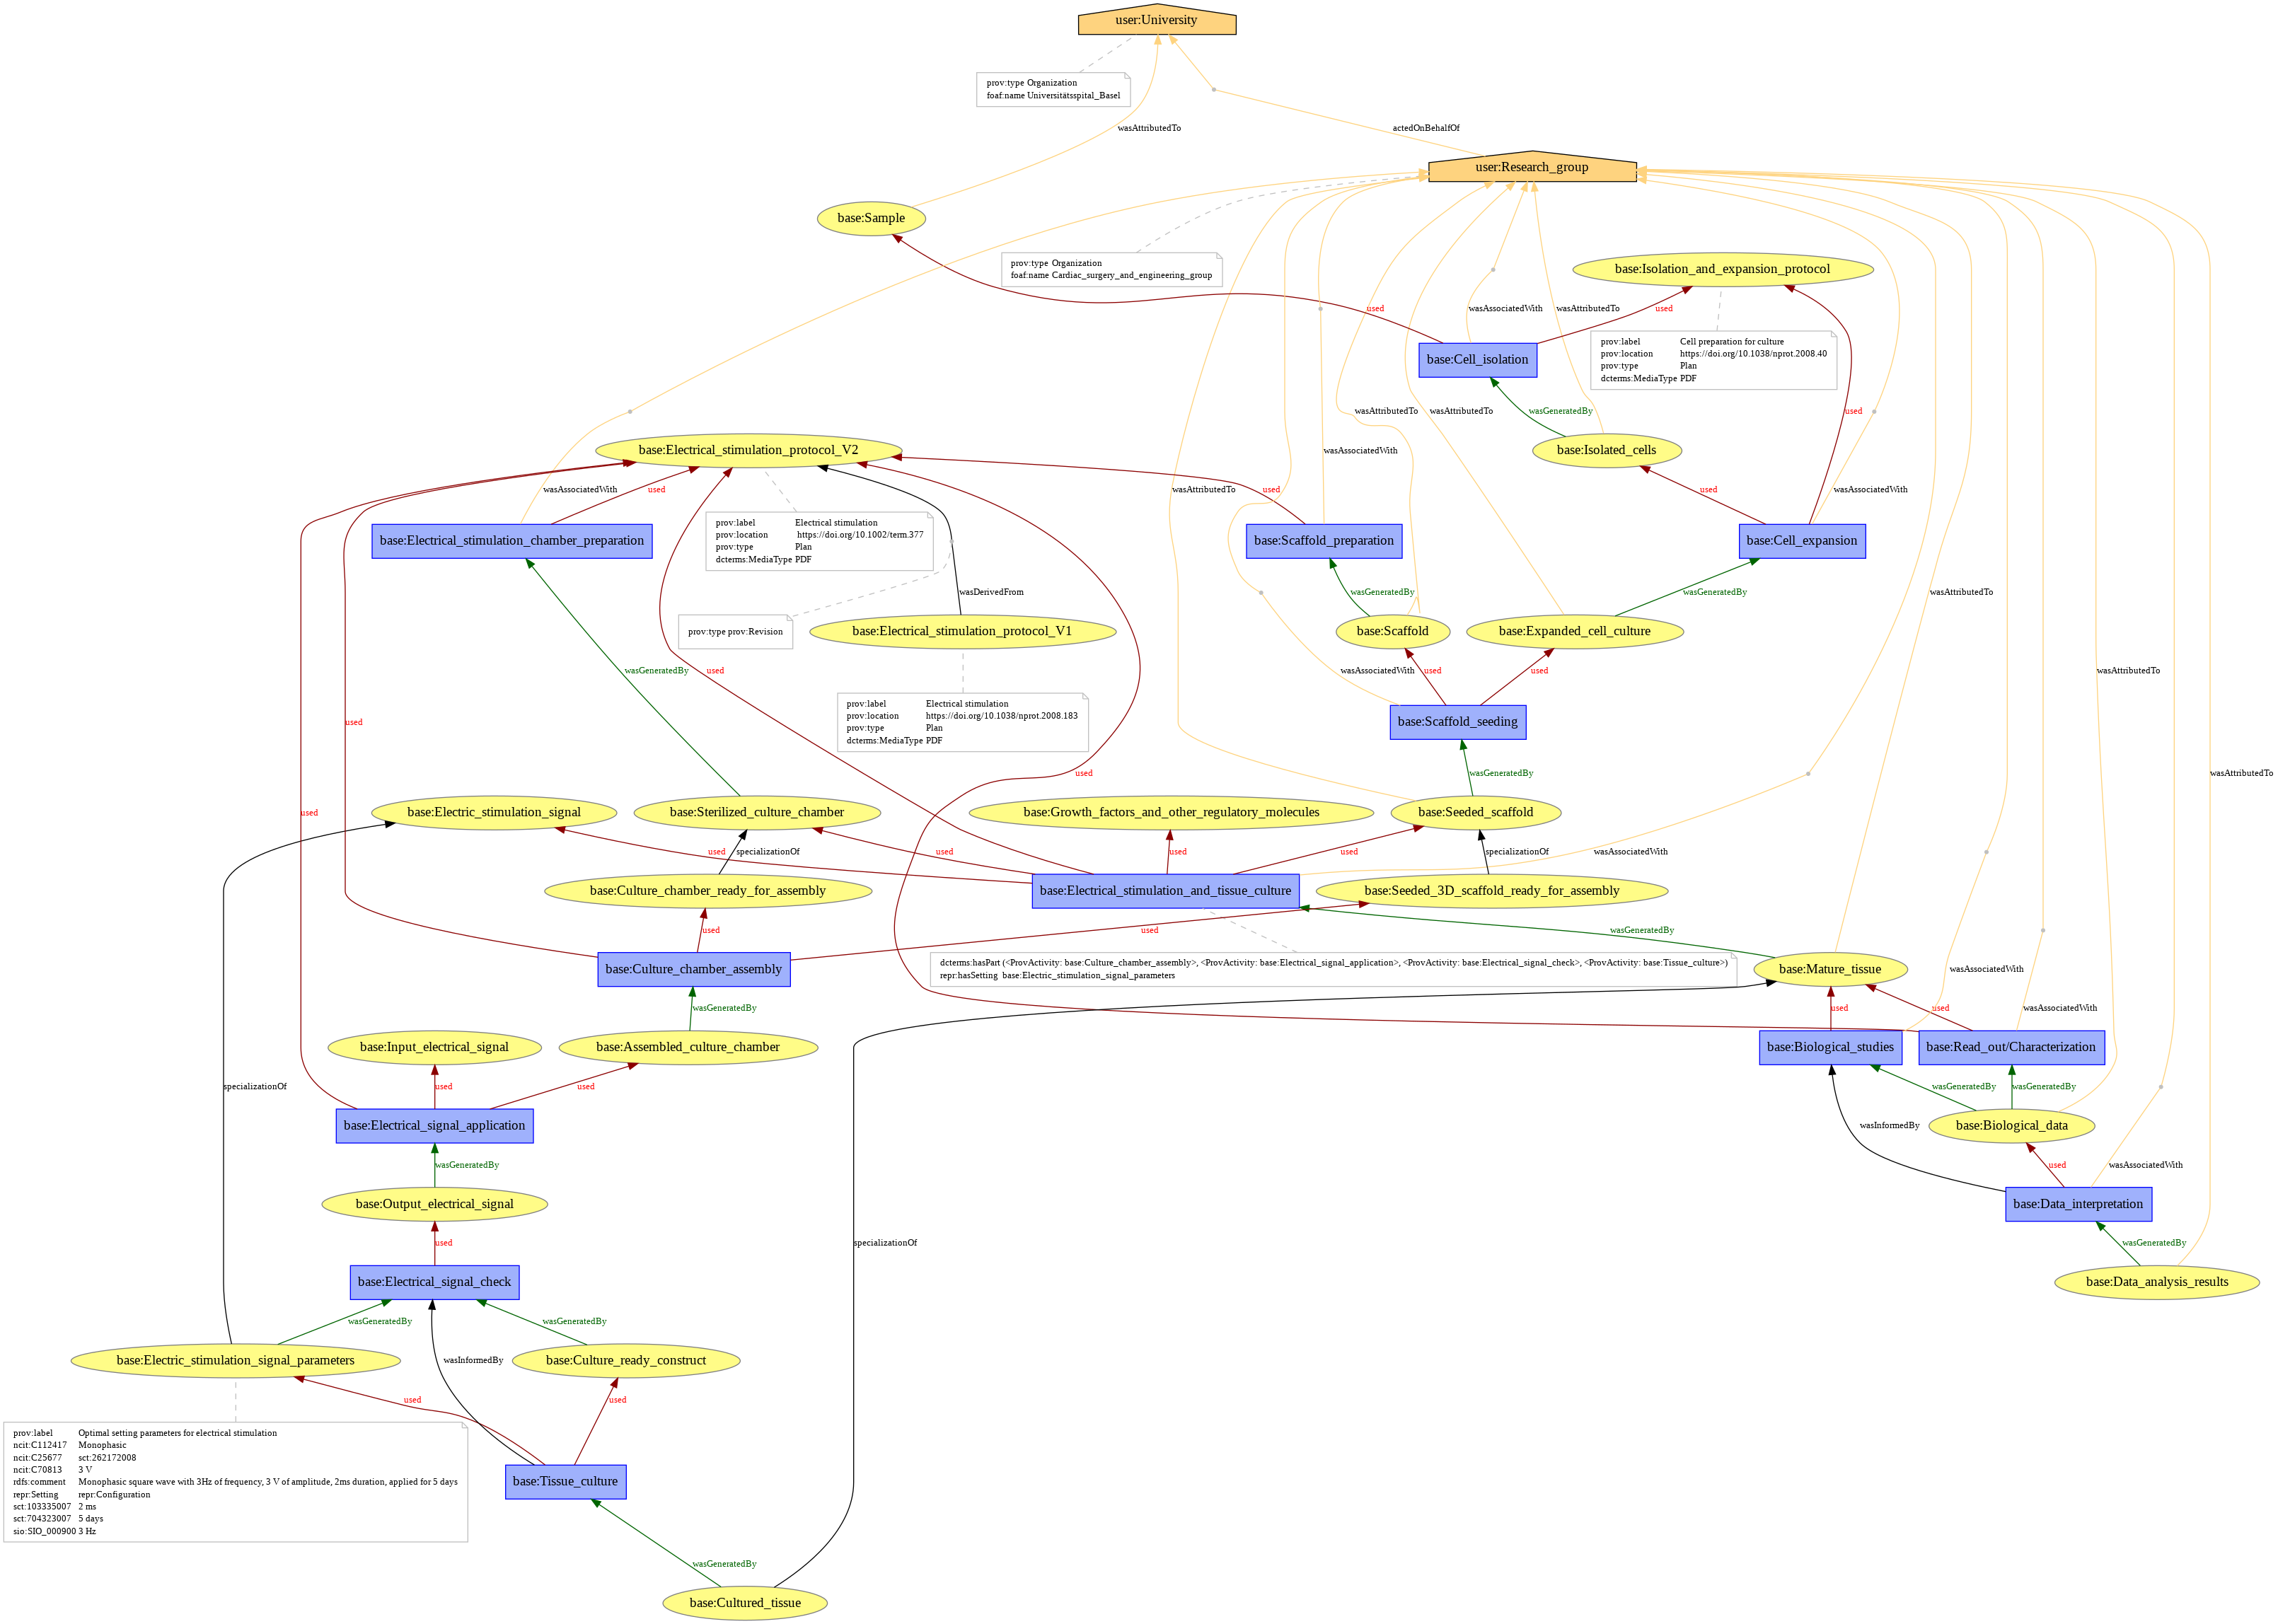

In [ ]:
# visualize the image
from IPython.display import Image 
Image('Cardiac_tissue_engineering_subactivities.png')

In [ ]:
# What we have so far (in PROV-N)
print(d1.get_provn())

document
  prefix foaf <http://xmlns.com/foaf/0.1/>
  prefix base <http://www.RDorg.it/>
  prefix user <http://www.RDorg.it/people/>
  prefix dcterms <http://purl.org/dc/terms/>
  prefix repr <https://w3id.org/reproduceme>
  prefix ncit <http://ncicb.nci.nih.gov/xml/owl/EVS/Thesaurus.owl#>
  prefix sio <http://semanticscience.org/resource/>
  prefix sct <http://snomed.info/id/>
  prefix rdfs <http://www.w3.org/2000/01/rdf-schema#>
  
  agent(user:University, [prov:type="Organization", foaf:name="Universitätsspital_Basel"])
  agent(user:Research_group, [prov:type="Organization", foaf:name="Cardiac_surgery_and_engineering_group"])
  actedOnBehalfOf(user:Research_group, user:University, -)
  entity(base:Sample)
  entity(base:Isolated_cells)
  entity(base:Expanded_cell_culture)
  entity(base:Scaffold)
  entity(base:Seeded_scaffold)
  entity(base:Mature_tissue)
  entity(base:Biological_data)
  entity(base:Growth_factors_and_other_regulatory_molecules)
  entity(base:Isolation_and_expansion_p

In [ ]:
#Turtle (PROV-O)
d1.serialize('Cardiac_tissue_engineering_subactivities.ttl', format='rdf', rdf_format='ttl')

In [ ]:
#XML (PROV-XML)
d1.serialize('Cardiac_tissue_engineering_subactivities.xml', format='xml')

ValueError: ignored